In [100]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy import stats
from scipy.stats import boxcox
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [64]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

<b>1. Non-stationary time series</b>

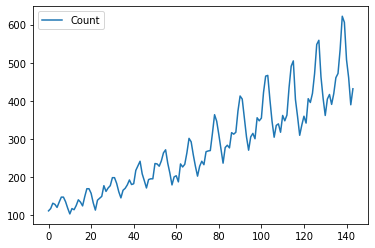

In [66]:
airlines_passengers.plot()
plt.show()
plt.rcParams["figure.figsize"] = (12,8)

In [67]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [68]:
series = airlines_passengers["Count"]

In [69]:
df_train, df_test = series[:132], series[132:]

In [70]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

In [71]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Count   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                          12594.681
Optimized:                         True   AIC                            633.686
Trend:                         Additive   BIC                            679.811
Seasonal:                Multiplicative   AICC                           639.739
Seasonal Periods:                    12   Date:                 Fri, 26 May 2023
Box-Cox:                          False   Time:                         15:12:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3761040                alpha                 True
smoothing_trend          

In [72]:
passenger_forecast = fitted.forecast(steps=12)

In [73]:
print(f'Mean Squared Error = {mean_squared_error(series[132:],passenger_forecast)}')

Mean Squared Error = 249.87287062171777


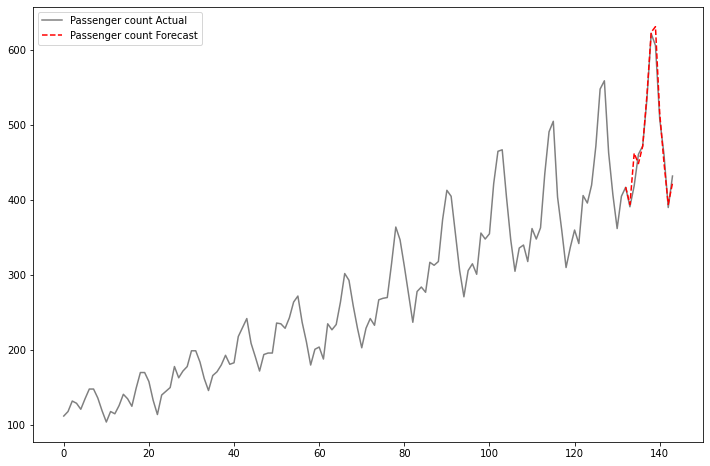

In [74]:
fig = plt.figure()
actual, = plt.plot(series.index, series, 'grey', label='Passenger count Actual')
forecast, = plt.plot(df_test.index, passenger_forecast, 'red', label='Passenger count Forecast', linestyle='dashed')
plt.legend(handles=[actual, forecast])
plt.show()

<b> 2. Stationary time series</b>

In [75]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [76]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


C:\Users\deanafanasev\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


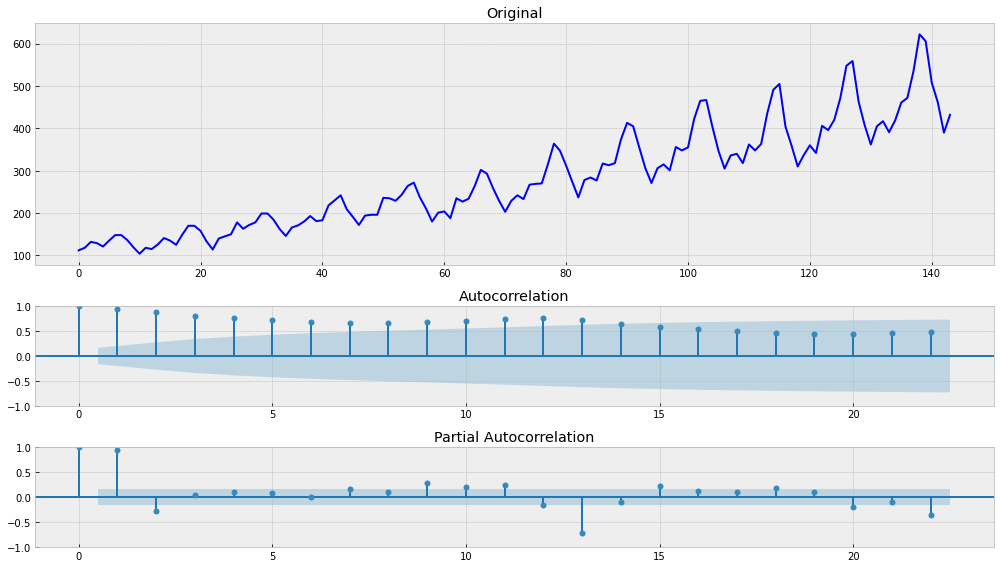

In [77]:
tsplot(series)

In [78]:
series_1, l = stats.boxcox(series)

In [90]:
series_1_1 = series_1[1:] - series_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.871708
p-value                          0.048738
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


C:\Users\deanafanasev\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


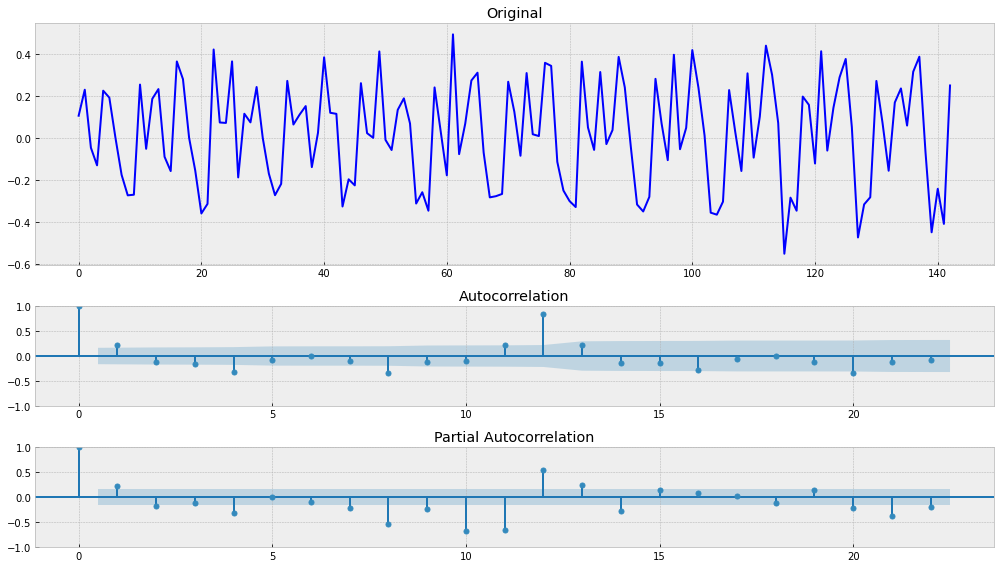

In [91]:
tsplot(series_1_1)

In [116]:
series_ = pd.Series(series_1_1)

In [118]:
series_.count()

143

In [119]:
df_1_train, df_1_test = series_[:131], series_[131:]

In [120]:
df_1_train

0      0.105332
1      0.229069
2     -0.047281
3     -0.130824
4      0.224479
         ...   
126    0.050621
127   -0.473990
128   -0.316759
129   -0.282703
130    0.270719
Length: 131, dtype: float64

In [133]:
model_1 = HWES(df_1_train, trend = 'add')
model_fitted = model_1.fit()

In [128]:
print(model_fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                  131
Model:             ExponentialSmoothing   SSE                              7.611
Optimized:                         True   AIC                           -364.776
Trend:                         Additive   BIC                           -353.275
Seasonal:                          None   AICC                          -364.098
Seasonal Periods:                  None   Date:                 Fri, 26 May 2023
Box-Cox:                          False   Time:                         15:30:27
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
smoothing_trend           1.3724e-

In [140]:
passenger_forecast_1 = model_fitted.forecast(steps=12)

In [141]:
print(f'Mean Squared Error = {mean_squared_error(series_[131:],passenger_forecast_1)}')

Mean Squared Error = 0.07139390042962022


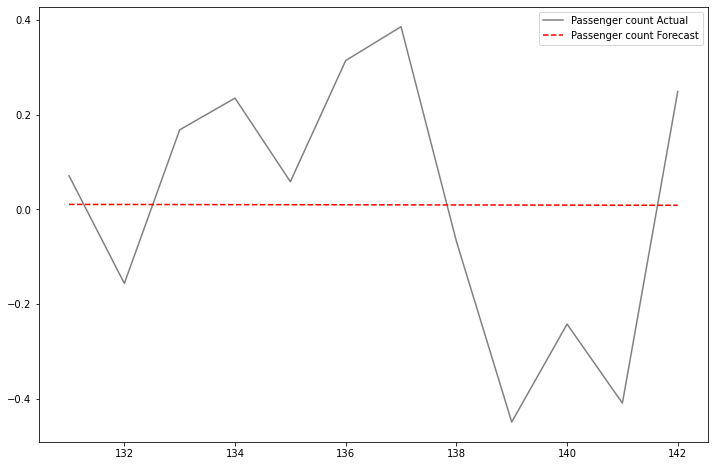

In [131]:
fig = plt.figure()
actual_1, = plt.plot(series_[131:], 'grey', label='Passenger count Actual')
forecast_1, = plt.plot(passenger_forecast_1, 'red', label='Passenger count Forecast', linestyle='dashed')
plt.legend(handles=[actual_1, forecast_1])
plt.show()